In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

In [15]:

# Import the dataset
white_wine = pd.read_csv("/content/wine-quality White.csv")



# Display the first few rows of the combined data
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [17]:
white_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [18]:
# Assuming the 'quality' column contains wine quality levels

# Define a function to map quality levels to two classes
def classify_quality(quality):
    if quality >= 3 and quality <= 5:
        return 0
    elif quality >= 6 and quality <= 9:
        return 1
    else:
        return None  # If any other value exists

# Apply the function to create a new column 'quality_class'
white_wine['quality_class'] = white_wine['quality'].apply(classify_quality)

# Check the first few rows to verify the transformation
print(white_wine[['quality', 'quality_class']].head(10))

   quality  quality_class
0        6              1
1        6              1
2        6              1
3        6              1
4        6              1
5        6              1
6        6              1
7        6              1
8        6              1
9        6              1


In [19]:
y = white_wine["quality_class"]
X = white_wine.drop(columns=["quality", "quality_class"])

In [20]:
y.value_counts()

,count
quality_class,
1,3258
0,1640


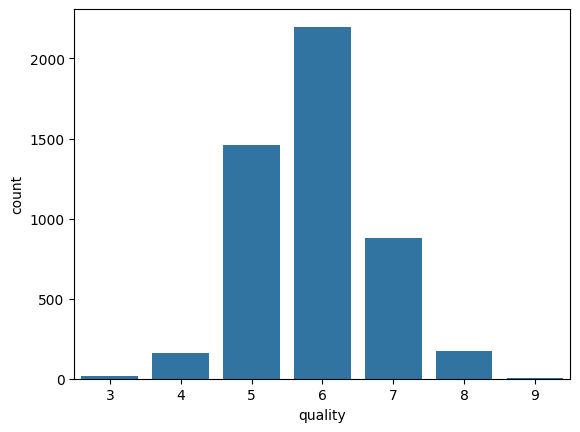

In [21]:

sns.countplot(x='quality', data=white_wine)
plt.show()

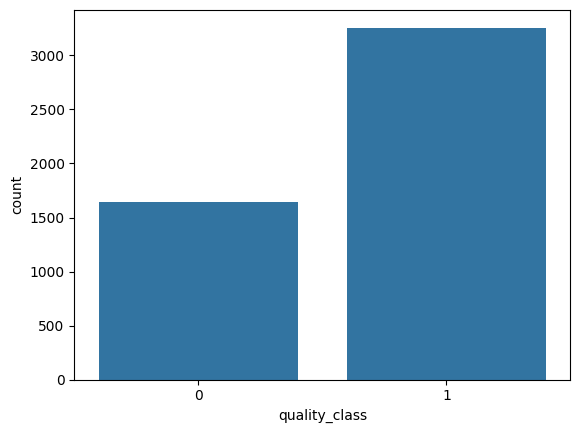

In [31]:
sns.countplot(x='quality_class', data=white_wine)
plt.show()

In [22]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
white_scaled= StandardScaler()

In [24]:
# Fit the Standard Scaler with the training data
X_scaler = white_scaled.fit(X_train)

In [25]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [26]:
# # Check the shape of both X_train_scaled and y_train
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

# # If the shapes do not match, recheck the splitting or preprocessing steps


X_train_scaled shape: (3673, 11)
y_train shape: (3673,)


In [27]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42, max_iter=200)

logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the model
logistic_model = LogisticRegression(solver='liblinear')  # Use 'liblinear' for small datasets

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver options
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best logistic regression model
best_logistic_model = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [29]:
# Make and save testing predictions with the saved logistic regression model using the test data
logistic_testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the predictions
logistic_testing_predictions

array([1, 0, 0, ..., 0, 1, 1])

In [30]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, logistic_testing_predictions)


0.7510204081632653